In [1]:
#import libraries
import pandas as pd
import os.path
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import plotly.express as px

Question 1: What Amsterdam will receive from tourist tax if the event lasts a week and you will
have 30.000 visitors?

In [2]:
#30.000 visitors times 7 days and 3 euros per person, per day.
x = 30.000 * 7 * 3
#also 7 percent of rental price per night for hotels, the average price of a hotel is 142,60 euros for double room
y = 0.07 * 142.60  * 7 * 15.000
#10 percent of rental price per night for AirBNB, 133,50 is the average price for a private room in Amsterdam through AirBNB
z = 0.10 * 133.50  * 7 * 15.000
print('total tax income w/ hotel stay:', x+y *1000)
print('total tax income w/ Airbnb stay:', y+z *1000)

total tax income w/ hotel stay: 1048740.0
total tax income w/ Airbnb stay: 1402798.1100000003


Question 2: Plot the amount of AirBnB locations per neighbourhood

De Baarsjes - Oud-West                    1382
Centrum-West                              1006
De Pijp - Rivierenbuurt                    935
Centrum-Oost                               793
Zuid                                       599
Westerpark                                 584
Oud-Oost                                   506
Bos en Lommer                              424
Oud-Noord                                  402
Oostelijk Havengebied - Indische Buurt     320
Watergraafsmeer                            262
Noord-West                                 218
IJburg - Zeeburgereiland                   183
Slotervaart                                164
Noord-Oost                                 137
Geuzenveld - Slotermeer                    116
Buitenveldert - Zuidas                     100
De Aker - Nieuw Sloten                      74
Gaasperdam - Driemond                       51
Bijlmer-Centrum                             47
Osdorp                                      44
Bijlmer-Oost 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,761411,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,4013546,Xsjong,NaN,Noord-Oost,52.40164,4.95106,Private room,61,3,303,2023-08-19,2.30,2,272,26,0363 D4AD DCF3 E72A 56A2
1,768274,Rental unit in Amsterdam · ★4.83 · 1 bedroom ·...,3678216,J & R,NaN,Westerpark,52.38855,4.88521,Entire home/apt,327,3,78,2023-08-16,0.64,1,16,6,0363 7A50 18E7 51D1 B7F9
2,768737,Boat in Amsterdam · ★4.82 · 1 bedroom · 1 bed ...,3877342,Nicole,NaN,Westerpark,52.37824,4.86826,Private room,109,2,341,2023-08-24,2.73,3,29,43,036396BE30827DDB9575
3,771217,Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...,4068486,Danielle,NaN,Zuid,52.34091,4.84802,Entire home/apt,290,3,10,2019-01-02,0.11,1,0,0,0363 D807 AD6C 499A F871
4,771343,Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...,2313061,Marcel,NaN,Centrum-West,52.37641,4.88303,Private room,150,1,699,2023-09-01,6.62,2,196,110,0363 8C61 E9B9 5582 913E


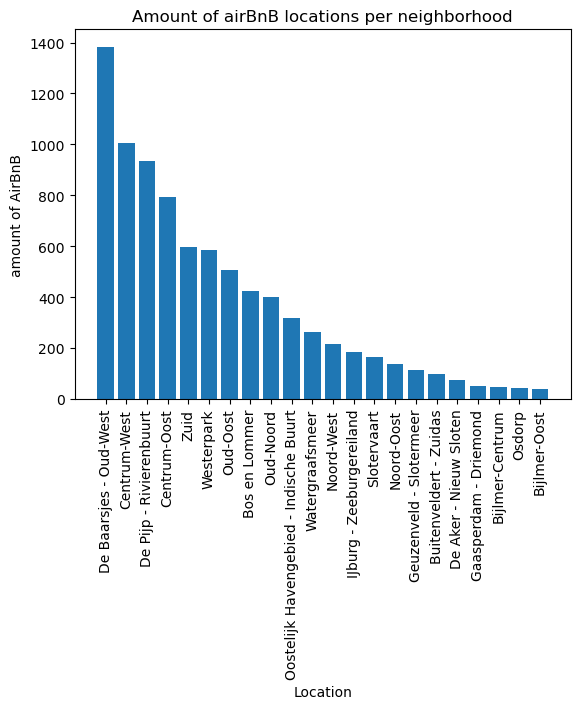

In [15]:
data = pd.read_csv("listings.csv", dtype=str, delimiter=',', header=0, index_col=None)

nh = data["neighbourhood"]


counts = nh.value_counts()
print(counts)
display(data.head())
plt.bar(counts.index, counts)



plt.xlabel('Location')
plt.ylabel('amount of AirBnB')
plt.title('Amount of airBnB locations per neighborhood')
plt.xticks(rotation=90) 
plt.show()

Question 3: Which street in Amsterdam has the most AirBnB apartments?

In [5]:
geolocator = Nominatim(user_agent= 'tryinams')
bnb_new = data[['id', 'latitude','longitude']]
bnb_new.insert(3,'street','')

# find out the location of per airbnb according to the coordinates
for i in range(len(bnb_new)):
    latitude, longitude = bnb_new.iloc[i]['latitude'], bnb_new.iloc[i]['longitude']
    location = geolocator.reverse(f"{latitude},{longitude}", timeout=None)
    try:
        street = location.raw['address']['road']
        bnb_new.loc[i, 'street'] = street
    except:
        pass

bnb_new.head()

,id,latitude,longitude,street
0,761411,52.40164,4.95106,Jisperveldstraat
1,768274,52.38855,4.88521,Zoutkeetsplein
2,768737,52.37824,4.86826,Centrale Groothandelsmarkt
3,771217,52.34091,4.84802,IJsbaanpad
4,771343,52.37641,4.88303,Derde Egelantiersdwarsstraat


In [8]:
#find out the street with most airbnb apartment
street_top5 = bnb_new['street'].value_counts().sort_values(ascending=False).head(5)
street_top5

Nassaukade                      141
Derde Egelantiersdwarsstraat    130
Hoofdweg                         70
Prinsengracht                    61
Keizersgracht                    58
Name: street, dtype: int64

Question 4:Try to cross reference the data from the AirBnB dataset with the BBGA. Can you figure
out if all apartments of AirBnB are designated as housing? Which number of
apartments are not rented out all the time but are also used as normal housing?

-

Question 5: How many hotel rooms should be built if Amsterdam wants to accommodate the same
number of tourists?

In [60]:
#split data from column into multiple columns to extract number of beds
find_beds = data['name'].str.split('·', expand=True)
find_beds.columns = ['type', 'stars', 'bedrooms', 'num_beds', 'baths']
#calculate number of beds from new column
num = find_beds['num_beds'].str.extract('([\d.]+)').astype(float)
total_beds = num[0].sum()
print('the total number of beds is:', int(total_beds))
#36860 hotelroom with 81300 beds
average_beds = 81300/36860
print('average beds per hotelroom', average_beds)
;
#Hotel rooms needed
hot_rooms = total_beds/average_beds
print()
print('Hotel rooms needed for the same amount of tourists:', int(hot_rooms))

the total number of beds is: 14713
average beds per hotelroom 2.205642973412914

Hotel rooms needed for the same amount of tourists: 6670


Question 6: How many different licenses are issued?

In [61]:
print(data['license'].nunique())

7288
